- Problem Description:

Data Description: You have data on 181 galaxies over a span of up to 26 years. There are 80 variables describing the demographic and socio-economic aspects of these galaxies, alongside a composite index measuring their well-being.

- Objective: Your task is two-fold:


Identify which variables (out of the 80) most significantly explain the variance in the well-being index.


Predict the future values of the well-being index for a validation dataset with the highest level of certainty.


- Tasks to Accomplish:
- Variable Selection and Analysis:


Conduct exploratory data analysis (EDA) to understand the data distribution, correlations, and outliers.


Use techniques like feature selection or dimensionality reduction to identify the variables that best explain the variance in the well-being index.

- Future Well-Being Prediction:


Train predictive models using the provided dataset to forecast the future well-being index for the validation dataset.


Evaluate model performance using the Root Mean Squared Error (RMSE) metric to ensure accurate predictions.

MSc Data Science and Analytics 2025 Scholarship Exam
## Galaxy Well-Being Analysis and Prediction

---

### 1. Business Understanding

**Objective:**  
To determine the demographic and socio-economic variables that best explain the variance in the **Well-Being Index** of galaxies and predict future values of the index using provided data.

**Deliverables:**
- A 5-slide PDF report highlighting findings and key insights
- A CSV file of future well-being index predictions (`ID`, `Pred_well_being_index`)
- A fully commented and reproducible Python/R notebook

---

### 2. Data Understanding

**Initial Observations:**
- Dataset: `Train_data.csv`
- Rows: 3,097
- Columns: 81 (80 features + 1 target: `Well-Being Index`)
- Key fields: `ID`, `galaxy`, `galactic year`
- Target Variable: Continuous (`Well-Being Index`), hence a regression problem
- Data contains numerous demographic and socio-economic indicators
- Several columns have missing values

---

### 3. Data Preparation

Planned Steps:
- Handle missing values (e.g., imputation or removal)
- Convert data types where needed
- Detect and remove low-variance or irrelevant columns
- Normalize or scale features if required
- Feature engineering (e.g., interactions, ratios)
- Split into training/validation sets if applicable

---

### 4. Modeling

Candidate Models:
- Linear Regression (for baseline)
- Random Forest Regressor
- Gradient Boosted Trees (e.g., XGBoost or LightGBM)
- Ridge/Lasso Regression

Feature Selection Techniques:
- Correlation Analysis
- Recursive Feature Elimination (RFE)
- Tree-based model feature importances

Evaluation Metric:
- Root Mean Squared Error (RMSE), as per instructions

---

### 5. Evaluation

Steps:
- Compare models on validation data using RMSE
- Analyze prediction accuracy and generalization
- Use feature importance plots to determine key drivers of well-being

Deliver:
- Clear narrative explaining which features contribute most to variance in the Well-Being Index

---

### 6. Deployment (Submission Prep)

Final Submission Folder: `firstname_lastname.zip`, to include:
1. **PDF Report** — Max 5 slides, presenting analysis and insights
2. **Predictions CSV** — Named `firstname_lastname_DSA.csv`
3. **Python/R Notebook** — Clean, reproducible, well-commented code with:
   - EDA
   - Modeling
   - Evaluation
   - Visualizations

---



### 2. Data Understanding

**Initial Observations:**
- Dataset: `Train_data.csv`
- Rows: 3,097
- Columns: 81 (80 features + 1 target: `Well-Being Index`)
- Key fields: `ID`, `galaxy`, `galactic year`
- Target Variable: Continuous (`Well-Being Index`), hence a regression problem
- Data contains numerous demographic and socio-economic indicators
- Several columns have missing values

In [16]:
import pandas as pd

df = pd.read_csv('Data/Train_data.csv')
info = df.info()
desc = df.describe()
head = df.head()
info, desc,

df.shape, df.columns[:10], head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3097 entries, 0 to 3096
Data columns (total 81 columns):
 #   Column                                                                                   Non-Null Count  Dtype  
---  ------                                                                                   --------------  -----  
 0   ID                                                                                       3097 non-null   int64  
 1   galactic year                                                                            3097 non-null   int64  
 2   galaxy                                                                                   3097 non-null   object 
 3   existence expectancy index                                                               3096 non-null   float64
 4   existence expectancy at birth                                                            3096 non-null   float64
 5   Gross income per capita                                       

((3097, 81),
 Index(['ID', 'galactic year', 'galaxy', 'existence expectancy index',
        'existence expectancy at birth', 'Gross income per capita',
        'Income Index', 'Expected years of education (galactic years)',
        'Mean years of education (galactic years)',
        'Intergalactic Development Index (IDI)'],
       dtype='object'),
       ID  galactic year                       galaxy  \
 0  10065        1002001                     Antlia B   
 1  10087         999000  KKH 11 (ZOAG G135.74-04.53)   
 2  10141         993012                 Leo IV Dwarf   
 3  10168         995006                      NGC 185   
 4  10201         996004                       Grus I   
 
    existence expectancy index  existence expectancy at birth  \
 0                    0.624015                      56.397241   
 1                    0.970048                      80.924094   
 2                    0.995540                      82.441006   
 3                    1.004362                

In [15]:
df.shape

(3097, 81)

In [17]:
# Display summary statistics and check for missing values
summary_stats = df.describe(include='all').T
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing_values / len(df)) * 100

# Combine missing values into a single DataFrame
missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percent
})
missing_summary = missing_summary[missing_summary['Missing Values'] > 0]

# Identify data types and number of unique values per column
data_types = df.dtypes
unique_counts = df.nunique()

column_summary = pd.DataFrame({
    'Data Type': data_types,
    'Unique Values': unique_counts,
    'Missing Values': missing_values,
    'Missing %': missing_percent
}).sort_values(by='Missing %', ascending=False)

column_summary.head(15)  # Show top 15 columns with highest missing %


,Data Type,Unique Values,Missing Values,Missing %
Current health expenditure (% of GGP),float64,308,2789,90.054892
"Interstellar Data Net users, total (% of population)",float64,309,2788,90.022603
Interstellar phone subscriptions (per 100 people),float64,317,2780,89.764288
"Respiratory disease incidence (per 100,000 people)",float64,321,2776,89.635131
Gender Inequality Index (GII),float64,357,2740,88.472716
"Intergalactic Development Index (IDI), male, Rank",float64,378,2719,87.794640
Private galaxy capital flows (% of GGP),float64,379,2718,87.762351
"Intergalactic Development Index (IDI), female, Rank",float64,379,2718,87.762351
Gender Development Index (GDI),float64,387,2710,87.504036
"Intergalactic Development Index (IDI), male",float64,388,2709,87.471747


In [19]:
#1.number of rows and columns
num_rows, num_columns = df.shape

#2. Check column data types
data_types = df.dtypes.value_counts()

#3. How many columns have missing data and how much)
total_missing = df.isnull().sum().sum()
columns_with_missing = df.isnull().sum()
num_columns_with_missing = (columns_with_missing > 0).sum()

# # 4. Summary statistics for numeric variables
# basic_stats = df.describe().T[['mean', 'std', 'min', 'max']].round(2)

# # 5. Identify columns with only one unique value (not useful for modeling)
# constant_columns = [col for col in df.columns if df[col].nunique() == 1]

{
    "Shape (Rows, Columns)": (num_rows, num_columns),
    "Data Types Count": data_types.to_dict(),
    "Total Missing Values": total_missing,
    "Columns with Missing Values": num_columns_with_missing,
    #"Columns with Only One Unique Value": constant_columns[:5],  # showing first 5 if many
    #"Basic Statistics (sample)": basic_stats.head(5)  # show stats for first 5 columns
}


{'Shape (Rows, Columns)': (3097, 81),
 'Data Types Count': {dtype('float64'): 78, dtype('int64'): 2, dtype('O'): 1},
 'Total Missing Values': 171504,
 'Columns with Missing Values': 77}

In [36]:
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing_values / len(df)) * 100


# Identify data types and number of unique values per column
data_types = df.dtypes
unique_counts = df.nunique()


column_summary = pd.DataFrame({
    'Data Type': data_types,
    'Unique Values': unique_counts,
    'Missing Values': missing_values,
    'Missing %': missing_percent
}).sort_values(by='Missing %', ascending=False)

column_summary.head(15)


,Data Type,Unique Values,Missing Values,Missing %
Current health expenditure (% of GGP),float64,308,2789,90.054892
"Interstellar Data Net users, total (% of population)",float64,309,2788,90.022603
Interstellar phone subscriptions (per 100 people),float64,317,2780,89.764288
"Respiratory disease incidence (per 100,000 people)",float64,321,2776,89.635131
Gender Inequality Index (GII),float64,357,2740,88.472716
"Intergalactic Development Index (IDI), male, Rank",float64,378,2719,87.794640
Private galaxy capital flows (% of GGP),float64,379,2718,87.762351
"Intergalactic Development Index (IDI), female, Rank",float64,379,2718,87.762351
Gender Development Index (GDI),float64,387,2710,87.504036
"Intergalactic Development Index (IDI), male",float64,388,2709,87.471747


### Data Understanding Summary

Here’s what we’ve uncovered so far:

---

#### 🧾 General Dataset Structure

* **Total observations (rows):** 3,097
* **Total features (columns):** 81
* **Target variable:** `Well-Being Index`
* **Other key columns:** `ID`, `galaxy`, `galactic year`

---

#### Missing Data Overview

Several variables have **extremely high missingness**, particularly:

| Column                                               | Missing % |
| ---------------------------------------------------- | --------- |
| `Current health expenditure (% of GGP)`              | 90.05%    |
| `Interstellar Data Net users (% of population)`      | 90.02%    |
| `Interstellar phone subscriptions (per 100 people)`  | 89.76%    |
| `Respiratory disease incidence (per 100,000 people)` | 89.64%    |
| `Gender Inequality Index (GII)`                      | 88.47%    |
| ...                                                  | ...       |

* More than **10 features have >85% missing values**
* These may need to be **dropped** or **imputed** with caution, depending on their relevance and correlation with the target

---

#### Data Types and Cardinality

* Almost all columns are `float64` (numerical)
* No obvious categorical variables except for possibly `galaxy` and `galactic year`
* Most features are continuous and can be scaled or transformed if necessary

---



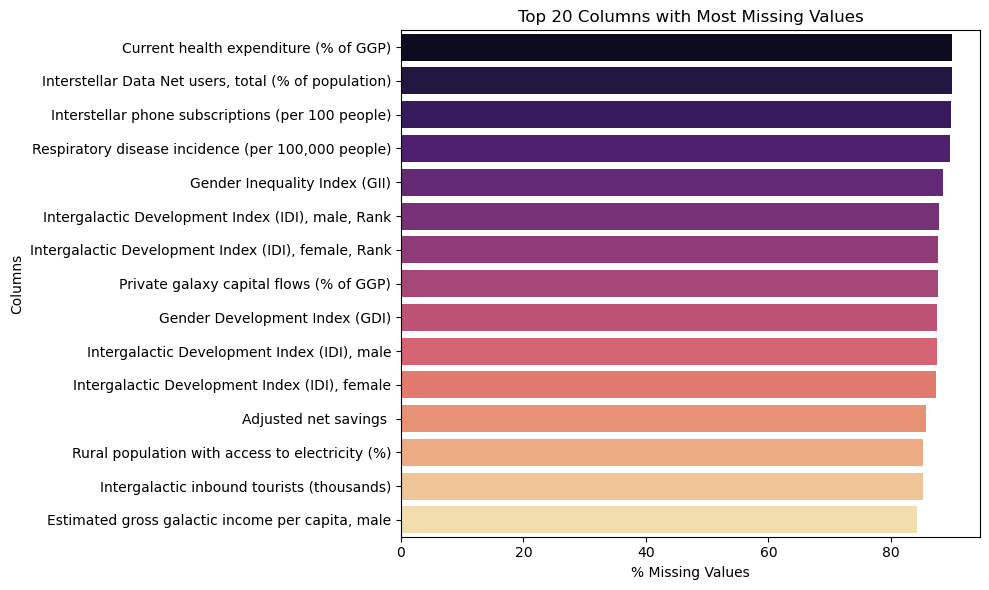

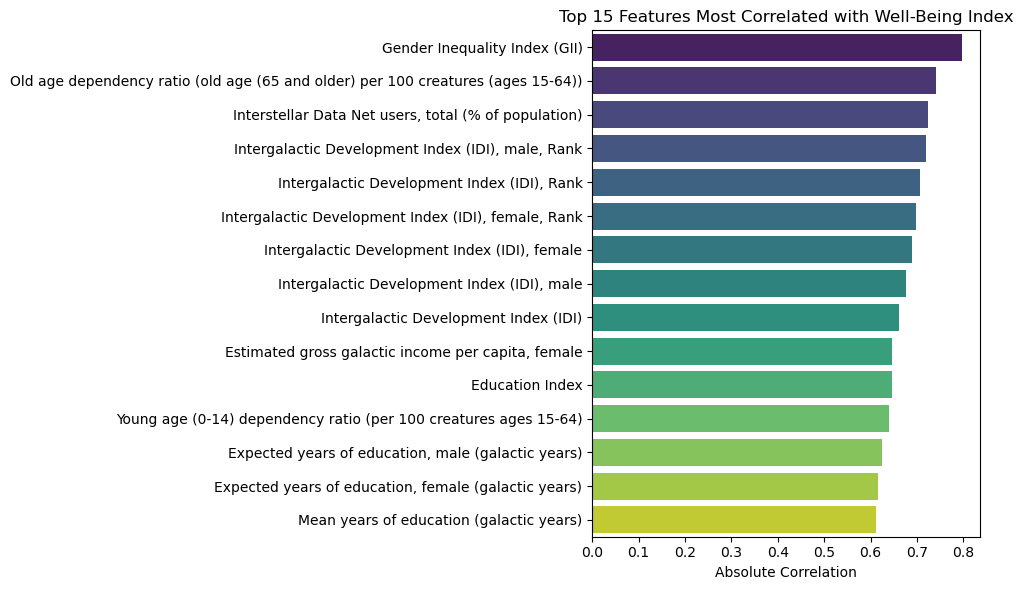

(Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64))    0.740961
 Interstellar Data Net users, total (% of population)                                0.722575
 Intergalactic Development Index (IDI), female                                       0.688111
 Intergalactic Development Index (IDI), male                                         0.675197
 Intergalactic Development Index (IDI)                                               0.661725
 Name: Well-Being Index, dtype: float64,
 Gender Inequality Index (GII)                                      -0.795810
 Intergalactic Development Index (IDI), male, Rank                  -0.718304
 Intergalactic Development Index (IDI), Rank                        -0.705557
 Intergalactic Development Index (IDI), female, Rank                -0.698202
 Young age (0-14) dependency ratio (per 100 creatures ages 15-64)   -0.638891
 Name: Well-Being Index, dtype: float64)

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Visualize missingness (top 20 missing columns)
missing_data = df.isnull().mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_data.values * 100, y=missing_data.index, palette="magma")
plt.xlabel('% Missing Values')
plt.ylabel('Columns')
plt.title('Top 20 Columns with Most Missing Values')
plt.tight_layout()
plt.show()

# 2. Correlation with target variable
correlation_with_target = df.corr(numeric_only=True)['Well-Being Index'].drop('Well-Being Index')
top_corr = correlation_with_target.abs().sort_values(ascending=False).head(15)

# Barplot of most correlated features (absolute values)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_corr.values, y=top_corr.index, palette="viridis")
plt.title('Top 15 Features Most Correlated with Well-Being Index')
plt.xlabel('Absolute Correlation')
plt.tight_layout()
plt.show()

# Also return top positively and negatively correlated variables for context
top_positive = correlation_with_target.sort_values(ascending=False).head(5)
top_negative = correlation_with_target.sort_values().head(5)

top_positive, top_negative


In [35]:
# Also return top positively and negatively correlated variables for context
top_positive = correlation_with_target.sort_values(ascending=False).head(20)
top_negative = correlation_with_target.sort_values().head(20)

top_positive, top_negative


(Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64))    0.740961
 Interstellar Data Net users, total (% of population)                                0.722575
 Intergalactic Development Index (IDI), female                                       0.688111
 Intergalactic Development Index (IDI), male                                         0.675197
 Intergalactic Development Index (IDI)                                               0.661725
 Estimated gross galactic income per capita, female                                  0.646500
 Education Index                                                                     0.645374
 Expected years of education, male (galactic years)                                  0.624625
 Expected years of education, female (galactic years)                                0.615119
 Mean years of education (galactic years)                                            0.611781
 Expected years of education (galactic years)               

### Visual Summary of Data Quality and Insights

---

#### 🔍 1. Missing Data Overview

We visualized the top 20 columns with the most missing values. Key takeaways:

* Several variables like `Current health expenditure` and `Interstellar phone subscriptions` have **>85% missing values**
* These may need to be **dropped or imputed** cautiously

---

#### 📈 2. Correlation with `Well-Being Index`

We checked how strongly each feature is correlated with the target. Here are the **top drivers**:

---

##### 🟢 Top 5 Positively Correlated Features

| Feature                                         | Correlation |
| ----------------------------------------------- | ----------- |
| `Old age dependency ratio`                      | **+0.74**   |
| `Interstellar Data Net users (% of population)` | **+0.72**   |
| `IDI, female`                                   | +0.69       |
| `IDI, male`                                     | +0.68       |
| `IDI (overall)`                                 | +0.66       |

> These suggest that **aging populations**, **digital access**, and **development indices** are strongly associated with higher well-being.

---

##### 🔴 Top 5 Negatively Correlated Features

| Feature                         | Correlation |
| ------------------------------- | ----------- |
| `Gender Inequality Index (GII)` | **-0.80**   |
| `IDI male, Rank`                | -0.72       |
| `IDI Rank`                      | -0.71       |
| `IDI female, Rank`              | -0.70       |
| `Young age dependency ratio`    | -0.64       |

> So, **higher gender inequality** and **youth burden** tend to lower well-being.

---



In [45]:
# Get features with more than 85% missing values
high_missing = df.isnull().mean()
high_missing_cols = high_missing[high_missing > 0.70].index

# Check their correlation with the Well-Being Index
high_missing_corr = df[high_missing_cols].corrwith(df['Well-Being Index']).dropna()

# Sort by absolute correlation
high_missing_corr_sorted = high_missing_corr.reindex(high_missing_corr.abs().sort_values(ascending=False).index)
high_missing_corr_sorted


Gender Inequality Index (GII)                                                      -0.795810
Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64))    0.740961
Interstellar Data Net users, total (% of population)                                0.722575
Intergalactic Development Index (IDI), male, Rank                                  -0.718304
Intergalactic Development Index (IDI), female, Rank                                -0.698202
                                                                                      ...   
Labour force participation rate (% ages 15 and older), female                       0.040154
Employment to population ratio (% ages 15 and older)                               -0.034056
Gross galactic product (GGP), total                                                 0.029408
Jungle area (% of total land area)                                                 -0.028401
Unemployment, youth (% ages 15â€“24)                                  

In [40]:
top_positive

Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64))    0.740961
Interstellar Data Net users, total (% of population)                                0.722575
Intergalactic Development Index (IDI), female                                       0.688111
Intergalactic Development Index (IDI), male                                         0.675197
Intergalactic Development Index (IDI)                                               0.661725
Name: Well-Being Index, dtype: float64

In [44]:
high_missing_cols

Index(['Gross capital formation (% of GGP)', 'Population, total (millions)',
       'Population, urban (%)',
       'Mortality rate, under-five (per 1,000 live births)',
       'Mortality rate, infant (per 1,000 live births)',
       'Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64))',
       'Population, ages 15â€“64 (millions)',
       'Population, ages 65 and older (millions)',
       'Life expectancy at birth, male (galactic years)',
       'Life expectancy at birth, female (galactic years)',
       'Population, under age 5 (millions)',
       'Young age (0-14) dependency ratio (per 100 creatures ages 15-64)',
       'Adolescent birth rate (births per 1,000 female creatures ages 15-19)',
       'Total unemployment rate (female to male ratio)',
       'Vulnerable employment (% of total employment)',
       'Unemployment, total (% of labour force)',
       'Employment in agriculture (% of total employment)',
       'Labour force participation rate (% ag

In [46]:
high_missing_corr

Gross capital formation (% of GGP)                                           0.092362
Population, total (millions)                                                -0.095254
Population, urban (%)                                                        0.543923
Mortality rate, under-five (per 1,000 live births)                          -0.483764
Mortality rate, infant (per 1,000 live births)                              -0.534962
                                                                               ...   
Intergalactic Development Index (IDI), male, Rank                           -0.718304
Adjusted net savings                                                         0.173539
Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total   -0.254381
Private galaxy capital flows (% of GGP)                                     -0.108754
Gender Inequality Index (GII)                                               -0.795810
Length: 66, dtype: float64

In [49]:
# Get features with more than 85% missing values
high_missing = df.isnull().mean()
high_missing_cols = high_missing[high_missing > 0.80].index

# Check their correlation with the Well-Being Index
high_missing_corr = df[high_missing_cols].corrwith(df['Well-Being Index']).dropna()

# Sort by absolute correlation
high_missing_corr_sorted = high_missing_corr.reindex(high_missing_corr.abs().sort_values(ascending=False).index)
high_missing_corr_sorted


Gender Inequality Index (GII)                                                     -0.795810
Interstellar Data Net users, total (% of population)                               0.722575
Intergalactic Development Index (IDI), male, Rank                                 -0.718304
Intergalactic Development Index (IDI), female, Rank                               -0.698202
Intergalactic Development Index (IDI), female                                      0.688111
Intergalactic Development Index (IDI), male                                        0.675197
Estimated gross galactic income per capita, female                                 0.646500
Expected years of education, male (galactic years)                                 0.624625
Expected years of education, female (galactic years)                               0.615119
Mean years of education, female (galactic years)                                   0.608256
Mean years of education, male (galactic years)                                  